<center><h1><bold>Battle of Neighborhoods Week2</bold></h1></center>

<center><h2><bold><u>Opening a Hungarian Restaurant In Cleveland, OH Neighborhoods</u></bold></h2></center>
<center>
<a href= "https://github.com/Csillag61/Coursera_Capstone">Link to my Github repository: //github.com/Csillag61/Coursera_Capstone</a></center>

<h3>Introduction</h3>

<p>Large-scale Hungarian immigration to this county began more than 40 years ago. Cleveland, OH has been a focal point for thousands of Hungarian newcomers.
The influx of Hungarians was so great at times that Cleveland was considered the city with the second largest Hungarian population, after Budapest, the capital of Hungary.
Their number was 203,417 in 2010 and 183,593 in 2014.Most of the Hungarians live in Cuyahoga County, Ohio, where they make up 3.1% of the total population.</p><br>

<p>Hungarian cuisine surely has some delights including hearty soups, stews and game dishes, simple but tasty casseroles and luscious cakes and pastries. Hungarian cuisine is a synthesis of ancient Uralic components mixed with West Slavic, Balkan, Austrian, and German. The food of Hungary can be considered a melting pot of the continent, with a culinary base formed from its own, original Magyar cuisine.  

Today we start to feel the effects of the deadly Wuhan virus outbrake. 
Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19. 
We will explore data to help us visualize and even predict the outcome that might or might not will influence our business decision to open or not to open a Hungarian cuisine restaurant in the near futur, so everyone of us can enjoy our world famoust dishes.</p>.









<h3>Data</h3>

<p><u>1. For the first part of my projet</u> to explore he Hungarian population in North America, I use the following data:
<ul><li>
    <a href="https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_10_1YR_DP02&prodType=table">Hungarian population in the US: //factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_10_1YR_DP02&prodType=table</a></li>
<p><u>Please note: Although the American Community Survey (ACS) produces population, demographic and housing unit estimates, 
it is the Census Bureau's Population Estimates Program that produces and disseminates the official estimates of the population 
for the nation, states, counties, cities, and towns and estimates of housing units for states and counties.</u></p>
<ul><li><a href="https://web.archive.org/web/20131213043218/http://www.hhrf.org/restitution/hungariansintheus.htm">Obserevation by states://web.archive.org/web/20131213043218/http://www.hhrf.org/restitution/hungariansintheus.htm</a></li>
<li><a href='http://zipatlas.com/us/oh/zip-code-comparison/percentage-hungarian-population.htm'>Observation in cities of OH://zipatlas.com/us/oh/zip-code-comparison/percentage-hungarian-population.htm</a></li></ul>


<p>2. <u>For the second part of my project</u> I am using the Four-square API as its prime data gathering source to explore Cleveland , OH neighborhood.</p>
<p> This API provides the ability to perform location search, location sharing and details about a business.</p>  

<p><u>3. For the last part of my project</u> I rely on the 2019 Novel Coronavirus COVID-19 <a href="https://github.com/CSSEGISandData/COVID-19"> Data Repository by Johns Hopkins CSSE://github.com/CSSEGISandData/COVID-19 </a>This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).</p>

In [ ]:
import geopy

In [3]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [4]:
import folium # map rendering library

In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


<h1><bold>Data scraping, DataFrame processing</bold></h1>


In [6]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Cleveland").text


In [7]:
from bs4 import BeautifulSoup # library to parse HTML and XML documents

In [8]:

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [9]:
# create a list to store neighborhood data
neighborhoodList = []

In [10]:
for row in soup.find_all(id="mw-pages")[0].findAll("li"):
    neighborhoodList.append(row.text)


In [11]:
# create a new DataFrame from the list
kl_df = pd.DataFrame({"Neighborhood": neighborhoodList})

kl_df.head(33)

,Neighborhood
0,"Asiatown, Cleveland"
1,"Bellaire–Puritas, Cleveland"
2,Broadway–Slavic Village
3,Brooklyn Centre
4,Buckeye–Shaker
5,Campus District
6,"Central, Cleveland"
7,Clark–Fulton
8,Collinwood
9,Detroit–Shoreway


In [12]:
kl_df.shape

(33, 1)

<h1><bold>Get the geographical coordinates</bold></h1>


In [13]:


import geocoder

In [14]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Cleveland, OH'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [15]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in kl_df["Neighborhood"].tolist() ]

In [16]:
coords


[[41.51294000000007, -81.66438999999997],
 [41.449200752620634, -81.76317598763566],
 [41.45346997446484, -81.63323000057687],
 [41.453790000000026, -81.70051999999998],
 [41.47995000000003, -81.59327999999994],
 [41.50168000000008, -81.67520999999994],
 [41.492014043467954, -81.68996591503989],
 [41.464330000000075, -81.70932999999997],
 [41.559090000000026, -81.57008999999994],
 [41.48279000000008, -81.73027999999994],
 [41.500540069392386, -81.7042899522477],
 [41.49840505650178, -81.68993378942098],
 [41.48861477035986, -81.76005655875484],
 [41.433867000000006, -81.56347095022211],
 [41.49661000000003, -81.70584999999994],
 [41.542864278419415, -81.61413970365012],
 [41.51367000000005, -81.66196999999994],
 [41.508441000000005, -81.64001123082814],
 [41.48123000000004, -81.67068999999998],
 [41.451050000000066, -81.81179999999995],
 [41.475120529063496, -81.62919653270245],
 [41.44126000000006, -81.56284999999997],
 [41.50369000000006, -81.68981999999994],
 [41.57436000000007, -81

In [17]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [18]:
# merge the coordinates into the original dataframe
kl_df['Latitude'] = df_coords['Latitude']
kl_df['Longitude'] = df_coords['Longitude']

In [19]:
# check the neighborhoods and the coordinates
print(kl_df.shape)
kl_df

(33, 3)


,Neighborhood,Latitude,Longitude
0,"Asiatown, Cleveland",41.512940,-81.664390
1,"Bellaire–Puritas, Cleveland",41.449201,-81.763176
2,Broadway–Slavic Village,41.453470,-81.633230
3,Brooklyn Centre,41.453790,-81.700520
4,Buckeye–Shaker,41.479950,-81.593280
5,Campus District,41.501680,-81.675210
6,"Central, Cleveland",41.492014,-81.689966
7,Clark–Fulton,41.464330,-81.709330
8,Collinwood,41.559090,-81.570090
9,Detroit–Shoreway,41.482790,-81.730280


In [20]:
# save the DataFrame as CSV file
kl_df.to_csv("kl_df.csv", index=False)

<h1><bold>Create a map of Cleveland with neighborhoods superimposed on top</bold></h1>

In [21]:
from geopy.geocoders import Nominatim

In [22]:
# get the coordinates of Cleveland
address = 'Cleveland, OH'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cleveland, OH {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cleveland, OH 41.5051613, -81.6934446.


In [23]:
import folium

In [24]:
# create map of Cleveland using latitude and longitude values
map_kl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(kl_df['Latitude'], kl_df['Longitude'], kl_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kl)  
    
map_kl

In [25]:
# save the map as HTML file
map_kl.save('map_kl.html')

<h1><bold>Use the Foursquare API to explore the neighborhoods</h1></bold>

In [26]:
# define Foursquare Credentials and Version
CLIENT_ID = '54NJAKPZD34FGQ4P310XPIWST1SSZUPY5DONDPWQ1UHMTFWO' # your Foursquare ID
CLIENT_SECRET = 'EGAQDGNYS1F31PMYD3EXH2W2MMSHD1RIYJELJDHKINALZKHO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 54NJAKPZD34FGQ4P310XPIWST1SSZUPY5DONDPWQ1UHMTFWO
CLIENT_SECRET:EGAQDGNYS1F31PMYD3EXH2W2MMSHD1RIYJELJDHKINALZKHO


 <h1><bold>Get the top 200 venues that are within a radius of 2000 meters.</h1></bold>

In [27]:
radius = 2000
LIMIT = 200

venues = []

for lat, long, neighborhood in zip(kl_df['Latitude'], kl_df['Longitude'], kl_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [28]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(2416, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,"Asiatown, Cleveland",41.51294,-81.66439,The Cleveland Flea,41.513145,-81.665677,Flea Market
1,"Asiatown, Cleveland",41.51294,-81.66439,Koko Bakery,41.509455,-81.662517,Bakery
2,"Asiatown, Cleveland",41.51294,-81.66439,Siam Cafe,41.516364,-81.664737,Chinese Restaurant
3,"Asiatown, Cleveland",41.51294,-81.66439,Map of Thailand,41.509472,-81.662421,Thai Restaurant
4,"Asiatown, Cleveland",41.51294,-81.66439,Slyman's Restaurant,41.512884,-81.671392,Sandwich Place


<h1><bold>Venues for each neighorhood</bold></h1>

In [29]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
"Asiatown, Cleveland",87,87,87,87,87,87
"Bellaire–Puritas, Cleveland",55,55,55,55,55,55
Broadway–Slavic Village,37,37,37,37,37,37
Brooklyn Centre,100,100,100,100,100,100
Buckeye–Shaker,60,60,60,60,60,60
Campus District,100,100,100,100,100,100
"Central, Cleveland",100,100,100,100,100,100
Clark–Fulton,100,100,100,100,100,100
Collinwood,41,41,41,41,41,41


<h1><bold>Unique categories from all the returned venues</bold></h1>

In [30]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 236 uniques categories.


In [31]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:234]

array(['Flea Market', 'Bakery', 'Chinese Restaurant', 'Thai Restaurant',
       'Sandwich Place', 'Vietnamese Restaurant', 'Shopping Mall',
       'Korean Restaurant', 'Dim Sum Restaurant', 'Diner', 'Art Gallery',
       'Asian Restaurant', 'Vegetarian / Vegan Restaurant',
       'Szechuan Restaurant', 'Shopping Plaza', 'Music Venue', 'Theater',
       'Camera Store', 'Museum', 'Credit Union', 'Performing Arts Venue',
       'Deli / Bodega', 'Coffee Shop', 'Grocery Store', 'Brewery',
       'Beer Bar', 'Bavarian Restaurant', 'Italian Restaurant',
       'American Restaurant', 'Gay Bar', 'Bar', 'Ethiopian Restaurant',
       'Breakfast Spot', 'Burger Joint', 'Indian Restaurant',
       'Ice Cream Shop', 'Pharmacy', 'Supermarket', 'Storage Facility',
       'Baseball Field', 'Wine Bar', 'Bank', 'Market', 'History Museum',
       'Discount Store', 'Mediterranean Restaurant',
       'Southern / Soul Food Restaurant', 'Gas Station', 'Auto Garage',
       'Park', 'Fast Food Restaurant', 'Har

In [33]:
# check if the results contain "Hungarian Restaurant"
"Hungarian Restaurant" in venues_df['VenueCategory'].unique()

True

<h1><bold>Analyze Each Neighborhood</bold></h1>

In [34]:
# one hot encoding
kl_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kl_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]

print(kl_onehot.shape)
kl_onehot.head()

(2416, 237)


,Neighborhoods,Airport,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bavarian Restaurant,Beach,Beer Bar,Big Box Store,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Liquor Store,Locksmith,Lounge,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nature Preserve,New American Restaurant,North Indian Restaurant,Optical Shop,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pier,Pizza Place,Playground,Plaza,Poke Place,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tram Station,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Asiatown, Cleveland",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Asiatown, Cleveland",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<h1><bold>Groupping by neighborhood, mean of the frequency of occurrence of each category</bold></h1>

In [35]:
kl_grouped = kl_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(kl_grouped.shape)
kl_grouped


(33, 237)


,Neighborhoods,Airport,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bavarian Restaurant,Beach,Beer Bar,Big Box Store,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Liquor Store,Locksmith,Lounge,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nature Preserve,New American Restaurant,North Indian Restaurant,Optical Shop,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pier,Pizza Place,Playground,Plaza,Poke Place,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tram Station,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,"Asiatown, Cleveland",0.00,0.011494,0.00,0.00,0.00,0.000000,0.011494,0.00,0.000000,0.011494,0.000000,0.00,0.000000,0.011494,0.000000,0.000000,0.00,0.022989,0.011494,0.022989,0.011494,0.00,0.000000,0.00,0.011494,0.000000,0.011494,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.011494,0.011494,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,0.00,0.00,0.045977,0.00,0.000000,0.000000,0.022989,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.011494,0.00,0.011494,0.000000,0.00,0.011494,0.022989,0.022989,0.000000,0.000000,0.000000,0.00000,0.011494,0.000000,0.011494,0.00,0.000000,0

In [36]:
len(kl_grouped[kl_grouped["Hungarian Restaurant"] > 0])

1

In [91]:
rest_rest=kl_grouped[kl_grouped["Restaurant"] > 0]
rest_rest

,Neighborhoods,Airport,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bavarian Restaurant,Beach,Beer Bar,Big Box Store,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Drugstore,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Lebanese Restaurant,Light Rail Station,Liquor Store,Locksmith,Lounge,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nature Preserve,New American Restaurant,North Indian Restaurant,Optical Shop,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pier,Pizza Place,Playground,Plaza,Poke Place,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tram Station,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
1,"Bellaire–Puritas, Cleveland",0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.018182,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.018182,0.018182,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.018182,0.000000,0.00,0.00,0.00,0.0,0.018182,0.00,0.000000,0.00,0.018182,0.00,0.000000,0.000000,0.00,0.018182,0.036364,0.00,0.00,0.018182,0.036364,0.00,0.00,0.000000,0.072727,0.018182,0.000000,0.000000,0.00000,0.00,0.036364,0.000000,0.00,0.018182,0.018182,0.00,0.000000,0.000000,0.000

In [95]:
rest_rest = kl_grouped[["Neighborhoods","Restaurant", "Bakery"]]

In [96]:
rest_rest

,Neighborhoods,Restaurant,Bakery
0,"Asiatown, Cleveland",0.000000,0.022989
1,"Bellaire–Puritas, Cleveland",0.018182,0.000000
2,Broadway–Slavic Village,0.000000,0.000000
3,Brooklyn Centre,0.010000,0.010000
4,Buckeye–Shaker,0.033333,0.000000
5,Campus District,0.010000,0.020000
6,"Central, Cleveland",0.020000,0.010000
7,Clark–Fulton,0.010000,0.020000
8,Collinwood,0.000000,0.000000
9,Detroit–Shoreway,0.000000,0.000000


In [78]:
len(kl_grouped[kl_grouped['Bakery']>0])

18

In [82]:
rest_rest

,Neighborhoods,Restaurant,Bakery
0,"Asiatown, Cleveland",0.000000,0.022989
1,"Bellaire–Puritas, Cleveland",0.018182,0.000000
2,Broadway–Slavic Village,0.000000,0.000000
3,Brooklyn Centre,0.010000,0.010000
4,Buckeye–Shaker,0.033333,0.000000
5,Campus District,0.010000,0.020000
6,"Central, Cleveland",0.020000,0.010000
7,Clark–Fulton,0.010000,0.020000
8,Collinwood,0.000000,0.000000
9,Detroit–Shoreway,0.000000,0.000000


<h1><bold>Create a new DataFrame for Hungarian Restaurant data only</bold></h1>

In [38]:
hu_rest = kl_grouped[["Neighborhoods","Hungarian Restaurant"]]

In [39]:
hu_rest

,Neighborhoods,Hungarian Restaurant
0,"Asiatown, Cleveland",0.000000
1,"Bellaire–Puritas, Cleveland",0.000000
2,Broadway–Slavic Village,0.000000
3,Brooklyn Centre,0.000000
4,Buckeye–Shaker,0.016667
5,Campus District,0.000000
6,"Central, Cleveland",0.000000
7,Clark–Fulton,0.000000
8,Collinwood,0.000000
9,Detroit–Shoreway,0.000000


<h1><bold>Elbow Curve to find the optimum number of clusters</bold></h1>

In [40]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

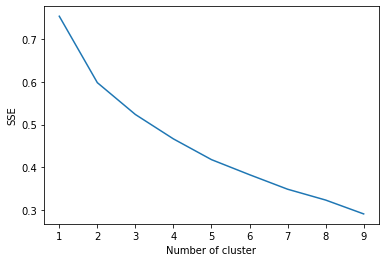

In [41]:
kl_grouped_clustering = kl_grouped.drop('Neighborhoods', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(kl_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

<h1><bold>Silhouette Scores and Cluster Visualizations</bold></h1>

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np

For 2  Clusters  the average silhouette_score is : 0.17154297438232288
For 3  Clusters  the average silhouette_score is : 0.1641681081984299
For 4  Clusters  the average silhouette_score is : 0.16415114632583339
For 5  Clusters  the average silhouette_score is : 0.17841097170887732


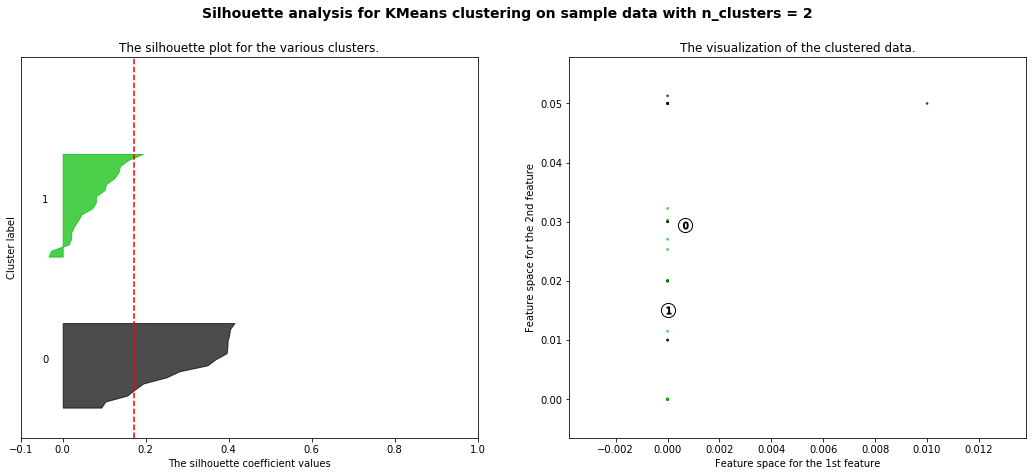

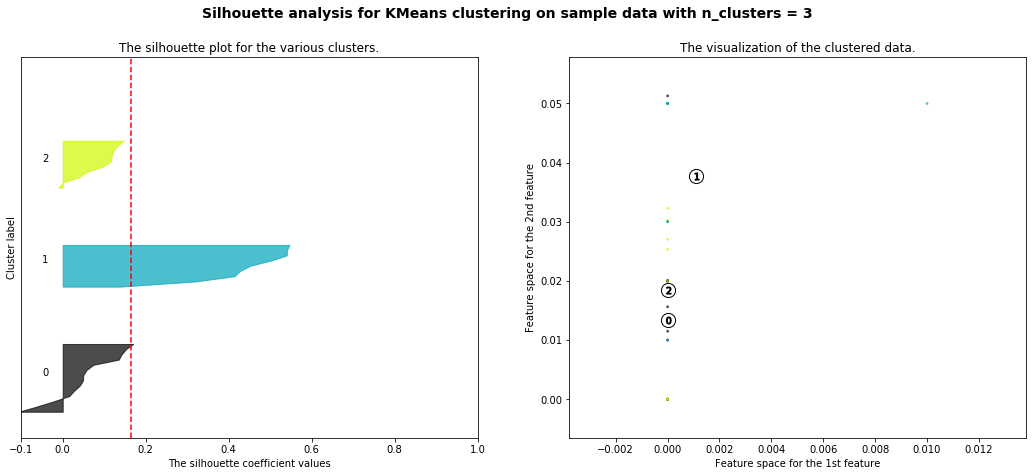

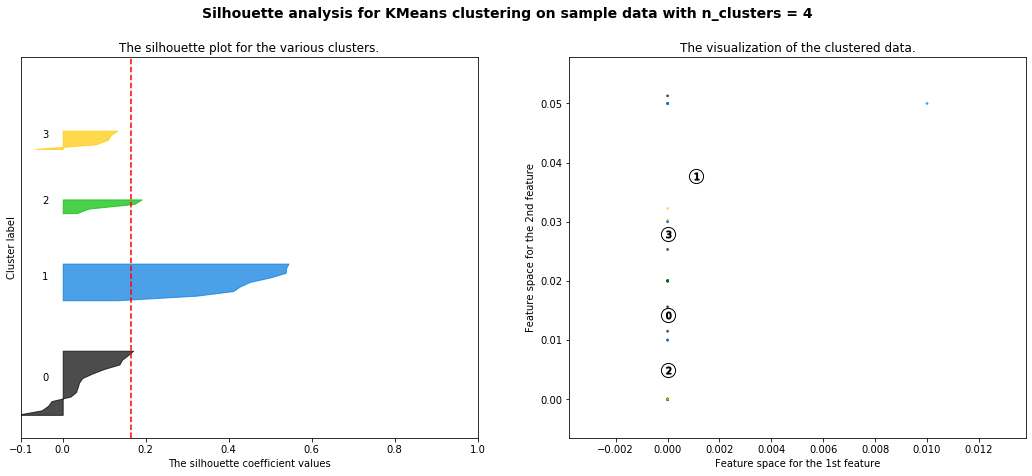

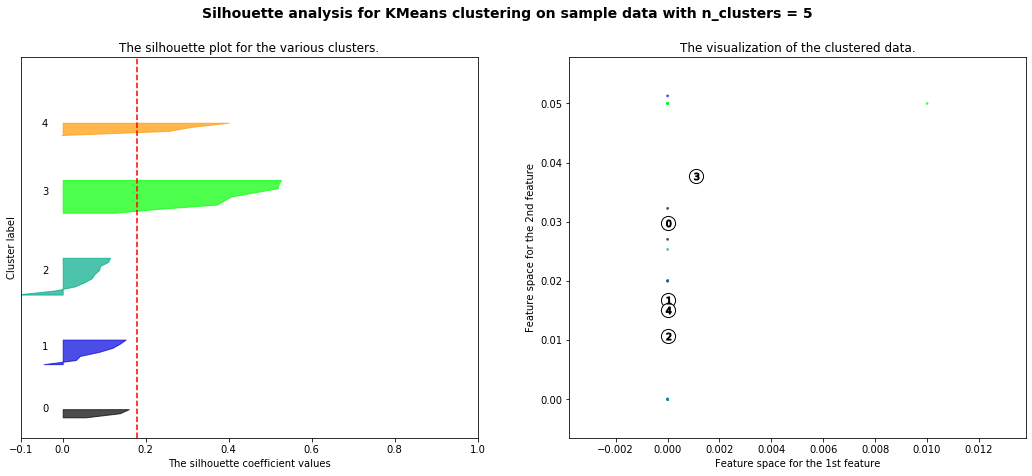

In [43]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(kl_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(kl_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(kl_grouped_clustering, cluster_labels)
    print("For", n_clusters, " Clusters  "
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(kl_grouped_clustering, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color1 = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color1, edgecolor=color1, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors2 = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(kl_grouped_clustering.iloc[:, 0], kl_grouped_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors2, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<h1><bold>7. Cluster Neighborhoods</bold></h1><br>
<h3><bold>Run k-means to cluster the neighborhoods in Cleveland into 3 clusters.</bold></h3>

In [44]:
import sys

In [47]:
# set number of clusters
kclusters = 3

kl_clustering = kl_grouped.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kl_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1,
       2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 0], dtype=int32)

In [48]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
kl_merged = hu_rest.copy()

# add clustering labels
kl_merged["Cluster Labels"] = kmeans.labels_

In [74]:
kl_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
kl_merged

,Neighborhood,Hungarian Restaurant,Cluster Labels,Latitude,Longitude
0,"Asiatown, Cleveland",0.000000,2,41.512940,-81.664390
1,"Bellaire–Puritas, Cleveland",0.000000,2,41.449201,-81.763176
2,Broadway–Slavic Village,0.000000,0,41.453470,-81.633230
3,Brooklyn Centre,0.000000,2,41.453790,-81.700520
4,Buckeye–Shaker,0.016667,0,41.479950,-81.593280
5,Campus District,0.000000,1,41.501680,-81.675210
6,"Central, Cleveland",0.000000,1,41.492014,-81.689966
7,Clark–Fulton,0.000000,2,41.464330,-81.709330
8,Collinwood,0.000000,2,41.559090,-81.570090
9,Detroit–Shoreway,0.000000,2,41.482790,-81.730280


In [50]:
# merge grouped with _data to add latitude/longitude for each neighborhood
kl_merged = kl_merged.join(kl_df.set_index("Neighborhood"), on="Neighborhood")

print(kl_merged.shape)
kl_merged.head() # check the last columns!

(33, 5)


,Neighborhood,Hungarian Restaurant,Cluster Labels,Latitude,Longitude
0,"Asiatown, Cleveland",0.000000,2,41.512940,-81.664390
1,"Bellaire–Puritas, Cleveland",0.000000,2,41.449201,-81.763176
2,Broadway–Slavic Village,0.000000,0,41.453470,-81.633230
3,Brooklyn Centre,0.000000,2,41.453790,-81.700520
4,Buckeye–Shaker,0.016667,0,41.479950,-81.593280


<h1><bold>Cluster visualization</bold></h1>

In [51]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_merged['Latitude'], kl_merged['Longitude'], kl_merged['Neighborhood'], kl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [52]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

<h1><bold>Examine Clusters</bold></h1><br>
<h3><bold>Cluster 0</bold></h3>

In [69]:
df1=kl_merged.loc[kl_merged['Cluster Labels'] == 0]
df1

,Neighborhood,Hungarian Restaurant,Cluster Labels,Latitude,Longitude
2,Broadway–Slavic Village,0.000000,0,41.453470,-81.633230
4,Buckeye–Shaker,0.016667,0,41.479950,-81.593280
13,"Fairfax, Cleveland",0.000000,0,41.433867,-81.563471
14,"Glenville, Cleveland",0.000000,0,41.542864,-81.614140
16,"Hough, Cleveland",0.000000,0,41.508441,-81.640011
19,"Kinsman, Cleveland",0.000000,0,41.475121,-81.629197
20,Lee–Miles,0.000000,0,41.441260,-81.562850
25,St. Clair–Superior,0.000000,0,41.524080,-81.641610
29,Union–Miles Park,0.000000,0,41.455520,-81.615140
32,"Woodland Hills, Cleveland",0.000000,0,41.488191,-81.630863


<h3><bold>Cluster 1</bold></h3>

In [62]:
df2=kl_merged.loc[kl_merged['Cluster Labels'] == 1]
df2

,Neighborhood,Hungarian Restaurant,Cluster Labels,Latitude,Longitude
5,Campus District,0.0,1,41.501680,-81.675210
6,"Central, Cleveland",0.0,1,41.492014,-81.689966
10,Downtown Cleveland,0.0,1,41.500540,-81.704290
11,East 4th Street District (Cleveland),0.0,1,41.498405,-81.689934
21,Nine-Twelve District,0.0,1,41.503690,-81.689820
23,"Ohio City, Cleveland",0.0,1,41.504730,-81.690740
27,The Flats,0.0,1,41.496610,-81.705850
30,University Circle,0.0,1,41.507270,-81.613150
31,"Warehouse District, Cleveland",0.0,1,41.498290,-81.698600


<h3><bold>Cluster 2</bold></h3>

In [63]:
df3=kl_merged.loc[kl_merged['Cluster Labels'] == 2]
df3

,Neighborhood,Hungarian Restaurant,Cluster Labels,Latitude,Longitude
0,"Asiatown, Cleveland",0.0,2,41.512940,-81.664390
1,"Bellaire–Puritas, Cleveland",0.0,2,41.449201,-81.763176
3,Brooklyn Centre,0.0,2,41.453790,-81.700520
7,Clark–Fulton,0.0,2,41.464330,-81.709330
8,Collinwood,0.0,2,41.559090,-81.570090
9,Detroit–Shoreway,0.0,2,41.482790,-81.730280
12,"Edgewater, Cleveland",0.0,2,41.488615,-81.760057
15,Goodrich–Kirtland Park,0.0,2,41.513670,-81.661970
17,Industrial Valley,0.0,2,41.481230,-81.670690
18,Kamm's Corners,0.0,2,41.451050,-81.811800


In [73]:
clusters=pd.DataFrame({"Cluster0":df1["Neighborhood"],
                      "Cluster1":df2["Neighborhood"],
                      "Cluster2":df3["Neighborhood"]
                      })


In [71]:
clusters=clusters.replace(np.nan, '', regex=True)

In [72]:
clusters

,Cluster0,Cluster1,Cluster2
0,,,"Asiatown, Cleveland"
1,,,"Bellaire–Puritas, Cleveland"
2,Broadway–Slavic Village,,
3,,,Brooklyn Centre
4,Buckeye–Shaker,,
5,,Campus District,
6,,"Central, Cleveland",
7,,,Clark–Fulton
8,,,Collinwood
9,,,Detroit–Shoreway


In [75]:
new_kl=kl_merged.set_index("Neighborhood",drop=True)
new_kl.head()

,Hungarian Restaurant,Cluster Labels,Latitude,Longitude
Neighborhood,,,,
"Asiatown, Cleveland",0.000000,2,41.512940,-81.664390
"Bellaire–Puritas, Cleveland",0.000000,2,41.449201,-81.763176
Broadway–Slavic Village,0.000000,0,41.453470,-81.633230
Brooklyn Centre,0.000000,2,41.453790,-81.700520
Buckeye–Shaker,0.016667,0,41.479950,-81.593280


<h1><bold>Observations</bold></h1><br>

<p>There is only 1 Hungarian restaurant located in  cluster 1 and no other ones in the rest of the clusters.<br>
This fact offer a great opportunity to open a new Hungarian restaurant as there is very little to no competition at all from existing ones.<br>
This project recommends property developers to capitalize on these findings to open new Hungarian restaurant in neighborhoods in cluster 0 or 2 with little to no competition.</p>